<a href="https://colab.research.google.com/github/lblum95/AML/blob/master/task2/Jannik_f.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 2

## Connection to drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive')

Mounted at /content/drive


## Import libraries

In [3]:
%matplotlib inline 

In [4]:
#General
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
#Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import plot_confusion_matrix
# Classifiers
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier

## Import data

In [5]:
x_train = pd.read_csv("data/X_train.csv",index_col=0,header = 0)
y_train = pd.read_csv("data/y_train.csv",index_col=0,header = 0)
x_test = pd.read_csv("data/X_test.csv",index_col=0,header = 0)

## Preprocess data

In [6]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Train/Test split

In [7]:
X_train, X_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=36)

## Initialise classifiers

In [25]:
sig=SVC(kernel='sigmoid', C=1.5, coef0=-0.5, class_weight='balanced',decision_function_shape='ovo', random_state=36)
rbf=SVC(kernel='rbf', C=1, class_weight='balanced',decision_function_shape='ovo', random_state=42)
poly=SVC(kernel='poly', C=1, coef0=0.2, degree=2, class_weight='balanced',decision_function_shape='ovo', random_state=96)
gauss = GaussianNB(priors=[6/13,1/13, 6/13])
tree = DecisionTreeClassifier(class_weight='balanced', random_state=36)

## Stack the classifiers

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6982551806019658


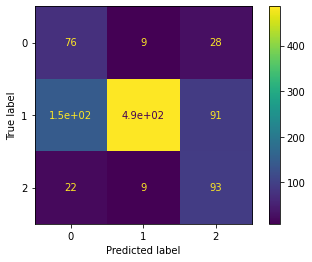

In [26]:
estimators = [
    ('sig', sig),
    ('rbf', rbf),
    ('poly', poly),
    ('gauss', gauss),
    ('tree', tree)
]
clf = StackingClassifier(
    estimators=estimators, final_estimator=SVC(class_weight='balanced', random_state=0), n_jobs=-1
)
clf.fit(X_train, y_train)
print(balanced_accuracy_score(y_val,clf.predict(X_val)))
plot_confusion_matrix(clf, X_val, y_val)
plt.show()

## Write to file

In [27]:
y_pred=clf.predict(x_test)
df = pd.DataFrame(y_pred)
df.to_csv('keras',header = ['y'], index_label = 'id')